## Copyright Note


## Deep Learning Reference 1
Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book: **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron**[ relative links](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
## Deep Learning Reference 2

Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book: **Deep Learning with Python by Francois Chollet (2018)**[relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

**Other examples are adapted from wiki and internet resources**


## Learning concepts:

1. Skim over the [Learning Curves for overfitting and underfitting](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) 
2. Paramater initialization and activation functions and [optimizers](https://mlfromscratch.com/optimizers-explained/#/).
4. Regularization. 
  - $l_1$, $l_2$
  - Early Stopping
  - Batch Normalization
  - Dropout  (original, $\alpha$, and Mont-Carlo)
  - Max-Norm regularization

# CNN resources

1. [Visualization](https://cs231n.github.io/convolutional-networks/#conv)
2. [Video 1](https://www.bing.com/videos/search?q=convolutional+neural+network&ru=%2fvideos%2fsearch%3fq%3dconvolutional%2bneural%2bnetwork%26FORM%3dHDRSC4&view=detail&mid=2060ED2EB80DF97D83CC2060ED2EB80DF97D83CC&&FORM=VDRVRV)
3. [Video 2](https://www.bing.com/videos/search?q=convolutional+neural+network&&view=detail&mid=0AAAB2D46328BEF7B47A0AAAB2D46328BEF7B47A&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dconvolutional%2Bneural%2Bnetwork%26FORM%3DHDRSC4)
4. [Video 3](https://www.bing.com/videos/search?q=convolutional+neural+network&ru=%2fvideos%2fsearch%3fq%3dconvolutional%2bneural%2bnetwork%26FORM%3dHDRSC4&view=detail&mid=4B47255FF6E8F654BFEE4B47255FF6E8F654BFEE&&FORM=VDRVRV)

In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


## Glorot and He Initialization for NN parameters

These initialzations are function of number of inputs and neurons (these numbers are called the fan-in and fan-out of the layer); fan_avg = (fan_in + fan_out)/2




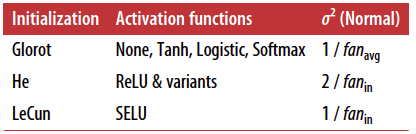

In [ ]:
# Network parameter initializations
[name for name in dir(keras.initializers) if not name.startswith("_")]

## [Activation Functions](https://arxiv.org/pdf/2010.09458.pdf) 

In [ ]:
[m for m in dir(keras.activations)if not m.startswith("_")]

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [ ]:

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

Unfortunately, the RELU **(Rectified Linear Unit)** activation function is not perfect. It suffers from a problem known as the dying ReLUs: during training, some neurons effectively die, meaning they stop outputting anything other than 0. In some cases, you may find that half of your network’s neurons are dead, especially if you used a large learning rate. A neuron dies when its weights get tweaked in such a way that the weighted sum of its inputs are negative for all instances in the training set. When this happens, it just keeps outputting 0s, and gradient descent does not affect it anymore since the gradient of the ReLU function is 0 when its input is negative.

## Leaky RELU

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

## Exponential linear unit (ELU)

* First it takes on negative values when z < 0, which allows the unit to have an average output closer to 0. This helps alleviate the vanishing gradients problem. The hyperparameter alpha defines the value that the ELU function approaches when z is a large negative number. It is usually set to 1, but you can tweak it like any other hyperparameter if you want.
* Second, it has a nonzero gradient for z < 0, which avoids the dead neurons problem.
* Third, if alpha is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent, since it does not bounce as much left and right of z = 0.

In [ ]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

In [ ]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

## [Self-Normalizing Neural Networks ELU (SELU)](https://arxiv.org/pdf/1706.02515.pdf)

* The input features must be standardized (mean 0 and standard deviation 1).
* Every hidden layer’s weights must also be initialized using LeCun normal initialization. In Keras, this means setting kernel_initializer="lecun_normal".
* The network’s architecture must be sequential. Unfortunately, if you try to use SELU in non-sequential architectures, such as recurrent networks  or networks with skip connections (i.e., connections that skip layers, such as in wide & deep nets), self-normalization will not be guaranteed, so SELU will not neces"
sarily outperform other activation functions.
* It guarantees self-normalization if all layers are dense. However, in practice the SELU activation function seems to work great with convolutional neural nets as well.

**Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ1 or ℓ2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize).**

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

## Comparison between  SELU and RELU

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the inputs to mean 0 and standard deviation 1:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## SELU

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

## RELU

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

* So which activation function should you use for the hidden layers
of your deep neural networks? Although your mileage will vary, in
general SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh > logistic. 

* If the network’s architecture prevents it from self normalizing,
then ELU may perform better than SELU (since SELU
is not smooth at z = 0). If you care a lot about runtime latency, then
you may prefer leaky ReLU. If you don’t want to tweak yet another
hyperparameter, you may just use the default alpha values used by
Keras (e.g., 0.3 for the leaky ReLU). If you have spare time and
computing power, you can use cross-validation to evaluate other
activation functions, in particular RReLU if your network is over"
fitting, or PReLU if you have a huge training set.



## Regularization

*$l_1$* and *$l_2$* regularization

In [ ]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

## [Batch Normalization](https://kharshit.github.io/blog/2018/12/28/why-batch-normalization)

In order to zero-center and normalize the inputs, the algorithm needs to estimate each input’s mean and standard deviation. It does so by evaluating the mean and standard deviation of each input over the current (mini-batch)/batch (hence the name “Batch Normalization”) [Algorithm 1](https://arxiv.org/abs/1502.03167).

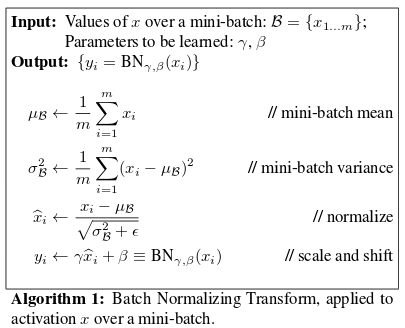

The technique consists of adding an operation in the model just before or after the activation function of each hidden layer, simply zero-centering and normalizing each input, then scaling and shifting the result using two new parameter vectors per layer: one for scaling, the other for shifting.

If you use BN in the first layer, you may not need to normalize the data.

Four parameter vectors are learned in each batch-normalized
layer: $\gamma$ (the ouput scale vector) and $\beta$ (the output offset vector) are learned through regular backpropagation, $\mu$ (the final input mean vector), and $\sigma$ (the final input
standard deviation vector) are estimated using an exponential moving average.  

You may find that training is rather slow, because each epoch takes
much more time when you use batch normalization. However, this
is usually counterbalanced by the fact that convergence is much
faster with BN, so it will take fewer epochs to reach the same performance. 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer some as well, it would be a waste of parameters, so you can set use_bias=False when creating those layers:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
 model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

## [Dropout](https://arxiv.org/abs/1207.0580)

At every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being
temporarily “dropped out,” meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate, and it is typically set to 50%. After training, neurons don’t get dropped anymore.
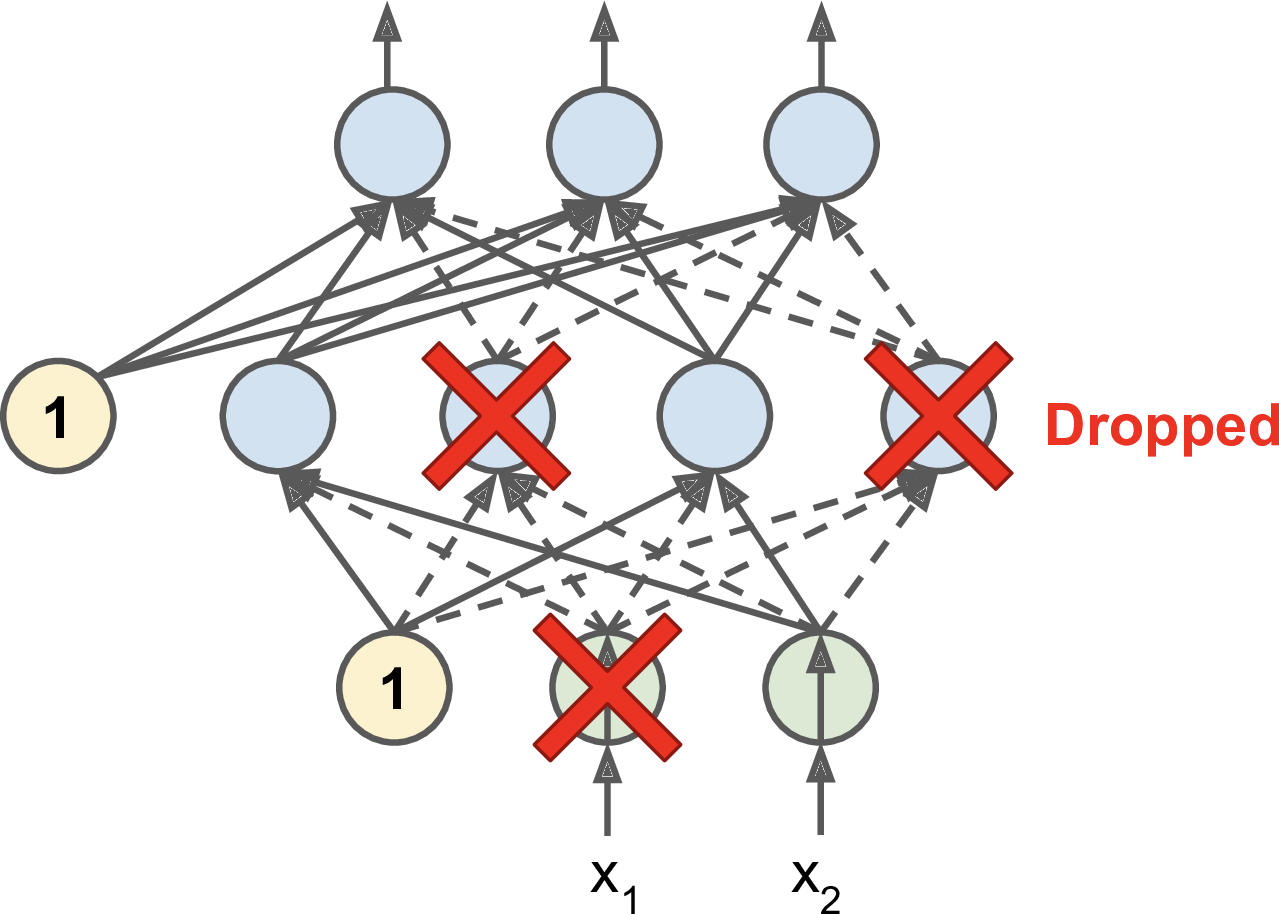

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

If you want to regularize a self-normalizing network based on the SELU activation function (as discussed earlier), you should use AlphaDropout: this is a variant of dropout that preserves the mean and standard deviation of its inputs (it was introduced in the same
paper as SELU, as regular dropout would break self-normalization).

## Alpha Dropout

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

## Max-Norm Regularization 

For each neuron, it constrains the weights $w$  of the incoming connections such that $ {\lVert w \rVert}_2 \le r$ where $r$ is the maz-norm hyperparamter. Max-norm regularization does not add a regularization loss term to the overall loss function. Instead, it is typically implemented by computing ${\lVert w \rVert}_2$ after each training step and clipping $w$, if needed to ($w \leftarrow w \frac{r}{{\lVert w \rVert}_2} $). Reducing $ r $ increases the amount of regularization and helps reduce overfitting.



In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [ ]:
from functools import partial
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

## Summary and Practical Guidelines 

##### (Read the last part in Chapter 11- Reference 1)

##### Recommended settings:
 
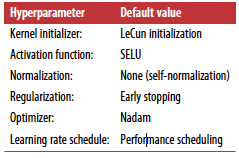